In [209]:
from PIL import Image
import os
import numpy as np
import random

In [210]:
for name in os.listdir("/data/Ro_ImageData/Low SN ratio ceramic images/"):
    if name.endswith(".tiff"):
        img=Image.open("/data/Ro_ImageData/Low SN ratio ceramic images/"+name)
        img=np.asarray(img)/255
        img=img.astype("uint8")
        img=Image.fromarray(img)
        name=name.strip(".tiff")+".png"
        img.save("/lfs/Nevils/Unet/real_lowSN/"+name)

2025


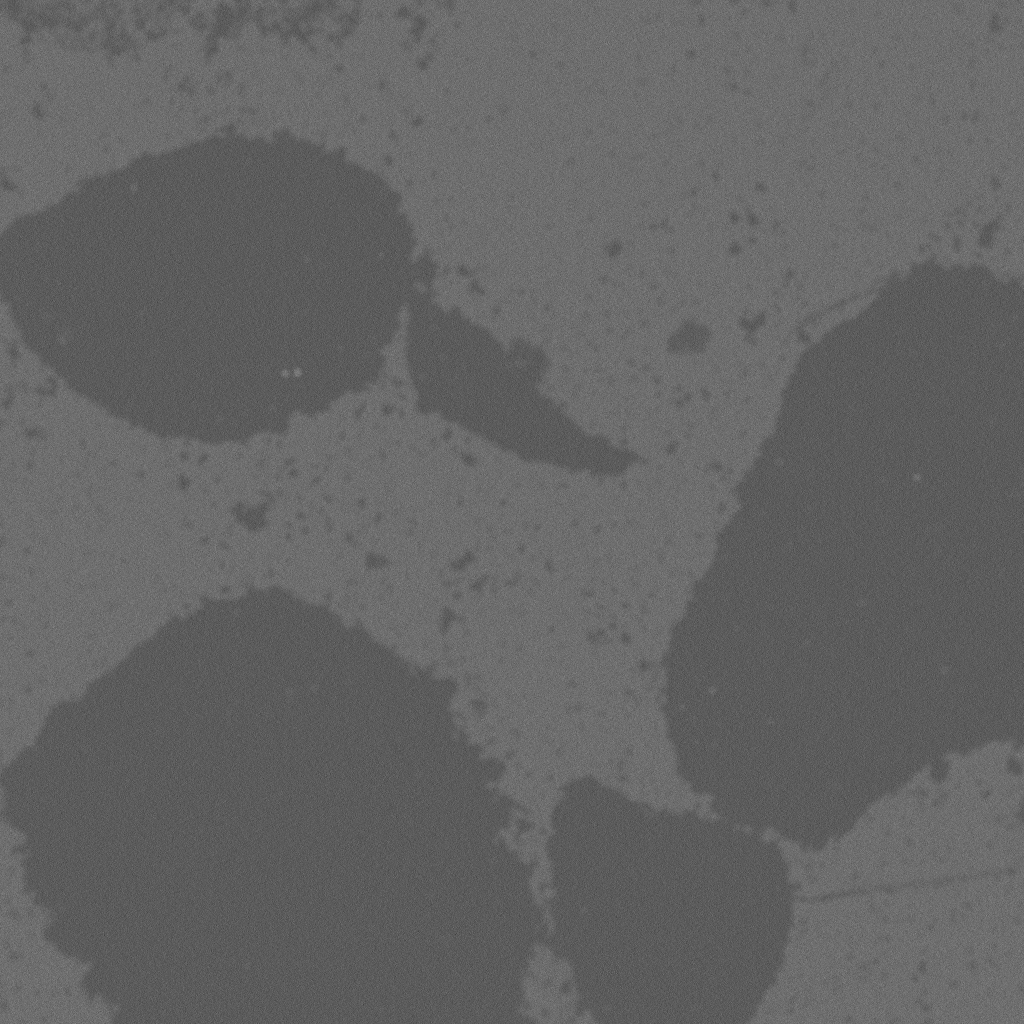

In [211]:
print(len(os.listdir("/lfs/Nevils/Unet/real_lowSN")))
Image.open("/lfs/Nevils/Unet/real_lowSN/Tile_r000_c000_C.png")

In [212]:
np.asarray(Image.open("/lfs/Nevils/Unet/real_lowSN/Tile_r000_c000_C.png"))

array([[ 93, 100, 105, ..., 120, 102, 119],
       [103, 104, 102, ..., 103, 102, 107],
       [101, 103, 102, ..., 107, 111, 112],
       ...,
       [107, 109, 113, ..., 114, 108, 107],
       [111, 111, 101, ..., 113, 109, 111],
       [106, 112, 109, ..., 107, 117, 105]], dtype=uint8)

DELETE AND RECREATE IMAGES DIRECTORY

In [213]:
save_list=os.listdir("/lfs/Nevils/Unet/inputs/art_noise/masks/0")
open_list=sorted(os.listdir("/lfs/Nevils/Unet/real_lowSN"))
for i in range(1000):
    save_name=save_list[i]
    open_name=open_list[i]
    img=Image.open("/lfs/Nevils/Unet/real_lowSN/"+open_name)
    img=img.resize((256,256))
    img.save("/lfs/Nevils/Unet/inputs/art_noise/images/"+save_name)


#LowSN_list=sorted(os.listdir("/lfs/Nevils/Unet/real_lowSN"))
#for i in LowSN_list:
#    img=Image.open("/lfs/Nevils/Unet/real_lowSN/"+i)
#    img=img.resize((256,256))
#    img.save("/lfs/Nevils/Unet/inputs/art_noise/images/"+i)

1000


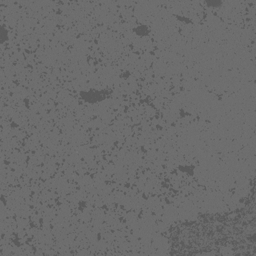

In [214]:
print(len(os.listdir("/lfs/Nevils/Unet/inputs/art_noise/images")))
Image.open("/lfs/Nevils/Unet/inputs/art_noise/images/Tile_r010_c000.png")

In [215]:
np.asarray(Image.open("/lfs/Nevils/Unet/inputs/art_noise/images/Tile_r018_c036.png"))

array([[111, 109, 109, ...,  90,  89,  90],
       [110, 103,  96, ...,  91,  91,  92],
       [ 94,  90,  92, ...,  90,  91,  92],
       ...,
       [ 91,  92,  90, ...,  89,  91,  92],
       [ 92,  92,  91, ...,  89,  92,  91],
       [ 92,  90,  91, ...,  91,  92,  90]], dtype=uint8)

Saving Results

In [216]:
for result in os.listdir("/lfs/Nevils/Unet/inputs/art_noise_NestedUNet_woDS/0"):
    index=save_list.index(result)
    final_name=open_list[index]
    img = Image.open("/lfs/Nevils/Unet/inputs/art_noise_NestedUNet_woDS/0/"+result)
    img=img.convert("1")
    img=img.convert("L")
    img.save("/lfs/Nevils/Results/"+final_name)
    img.save("Unet_LowSN_Pred/"+final_name)

In [217]:
np.asarray(Image.open("/lfs/Nevils/Results/Tile_r000_c000_C.png"))

array([[  0, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

1000


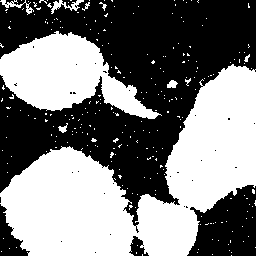

In [218]:
print(len(os.listdir("/lfs/Nevils/Results/")))
Image.open("/lfs/Nevils/Results/Tile_r000_c000_C.png")

Creating the Comparison Group

In [219]:
otsu_list=os.listdir("/data/Ro_ImageData/32xOTSU/")
for i in otsu_list:
    if i.endswith(".html"):
        otsu_list.remove(i)
for name in random.sample(otsu_list, 1000):
    if name.endswith(".tiff"):
        img=Image.open("/data/Ro_ImageData/32xOTSU/"+name)
        img=img.resize((256,256))
        img=img.convert("1")
        img=img.convert("L")
        name=name.strip(".tiff")+".png"
        img.save("Otsu_HighSN_Pred/"+name)

1000


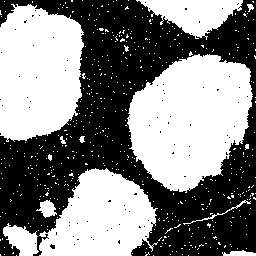

In [220]:
print(len(os.listdir("Otsu_HighSN_Pred/")))
Image.open("Otsu_HighSN_Pred/Tile_r000_c000.png")

In [221]:
np.asarray(Image.open("Otsu_HighSN_Pred/Tile_r000_c000.png"))

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [255,   0,   0, ..., 255, 255, 255],
       [255,   0,   0, ..., 255, 255, 255]], dtype=uint8)

Creating the Control Group

In [225]:
otsu_list=os.listdir("/data/Ro_ImageData/32xOTSULow/")
for i in otsu_list:
    if i.endswith(".html"):
        otsu_list.remove(i)
for name in random.sample(otsu_list, 1000):
    if name.endswith(".tiff"):
        img=Image.open("/data/Ro_ImageData/32xOTSULow/"+name)
        img=img.resize((256,256))
        img=img.convert("1")
        img=img.convert("L")
        name=name.strip(".tiff")+".png"
        img.save("Otsu_LowSN_Pred/"+name)

1000


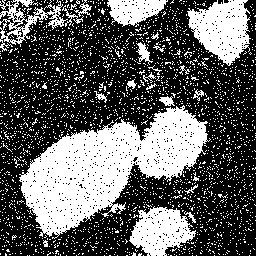

In [227]:
print(len(os.listdir("Otsu_LowSN_Pred/")))
Image.open("Otsu_LowSN_Pred/Tile_r000_c002_C.png")

In [228]:
np.asarray(Image.open("Otsu_LowSN_Pred/Tile_r000_c002_C.png"))

array([[  0,   0, 255, ...,   0,   0,   0],
       [255,   0, 255, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)